# EDA: total population by geographic region

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [3]:
pd.options.display.float_format = '{:,.0f}'.format

In [4]:
import warnings

def disable_pandas_warnings():
    warnings.resetwarnings()  # Maybe somebody else is messing with the warnings system?
    warnings.filterwarnings('ignore')  # Ignore everything
    # ignore everything does not work: ignore specific messages, using regex
    warnings.filterwarnings('ignore', '.*A value is trying to be set on a copy of a slice from a DataFrame.*')
    warnings.filterwarnings('ignore', '.indexing past lexsort depth may impact performance')
disable_pandas_warnings()

In [6]:
df = pd.read_csv('dataSetsEDA\\region\\region_population.csv')

In [12]:
df

,country_name,country_code,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,AFRICA EASTERN AND SOUTHERN,AFE,"309,890,664","318,544,083","326,933,522","335,625,136","344,418,362","353,466,601","362,985,802","372,352,230",...,"537,792,950","552,530,654","567,891,875","583,650,827","600,008,150","616,377,331","632,746,296","649,756,874","667,242,712","685,112,705"
1,AFRICA WESTERN AND CENTRAL,AFW,"206,739,024","212,172,888","217,966,101","223,788,766","229,675,775","235,861,484","242,200,260","248,713,095",...,"366,489,204","376,797,999","387,204,553","397,855,507","408,690,375","419,778,384","431,138,704","442,646,825","454,306,063","466,189,102"
2,EAST ASIA & PACIFIC,EAS,"1,818,247,576","1,844,603,995","1,869,453,624","1,893,594,516","1,917,553,356","1,940,892,820","1,964,042,971","1,986,768,093",...,"2,225,992,094","2,243,776,727","2,261,274,500","2,278,232,287","2,294,507,020","2,310,721,864","2,327,134,580","2,341,387,076","2,353,862,247","2,363,940,425"
3,EUROPE & CENTRAL ASIA,ECS,"842,030,509","846,364,518","849,816,712","852,735,458","854,892,657","856,511,549","858,209,225","859,711,482",...,"891,279,641","894,762,079","899,035,925","903,601,049","908,123,143","912,374,705","915,855,416","918,782,553","921,179,725","923,103,879"
4,LATIN AMERICA & CARIBBEAN,LCN,"441,597,528","449,847,635","458,008,075","466,139,063","474,258,790","482,331,291","490,304,061","498,199,382",...,"595,510,008","602,139,396","608,642,242","615,046,755","621,390,109","627,668,470","633,797,190","639,628,226","645,295,804","650,534,967"
5,MIDDLE EAST & NORTH AFRICA,MEA,"256,203,998","263,445,808","270,652,251","276,897,626","282,903,612","289,154,944","295,366,235","301,680,248",...,"406,045,323","414,117,603","422,790,409","431,664,579","440,506,473","448,917,409","456,885,486","465,073,490","473,201,775","479,966,649"
6,NORTH AMERICA,NAC,"277,373,464","281,077,441","284,943,859","288,662,674","292,185,983","295,640,057","299,064,347","302,623,445",...,"345,987,373","348,656,682","351,207,902","353,888,902","356,507,139","359,245,796","361,731,237","363,967,201","365,995,094","369,602,177"
7,SOUTH ASIA,SAS,"1,141,434,379","1,166,599,697","1,192,502,803","1,219,279,298","1,246,240,229","1,272,943,087","1,299,452,085","1,326,029,761",...,"1,684,436,757","1,708,114,582","1,731,137,145","1,753,568,847","1,775,178,483","1,796,850,154","1,818,868,706","1,840,534,093","1,861,598,514","1,882,531,620"
8,SUB-SAHARAN AFRICA,SSF,"516,629,688","530,716,971","544,899,623","559,413,902","574,094,137","589,328,085","605,186,062","621,065,325",...,"904,282,154","929,328,653","955,096,428","981,506,334","1,008,698,525","1,036,155,715","1,063,885,000","1,092,403,699","1,121,548,775","1,151,301,807"


### Let's eliminate the WORLD row because it's a results register

In [11]:
df = df[df['country_name'] != 'WORLD']

In [13]:
df.head()

,country_name,country_code,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
0,AFRICA EASTERN AND SOUTHERN,AFE,"309,890,664","318,544,083","326,933,522","335,625,136","344,418,362","353,466,601","362,985,802","372,352,230",...,"537,792,950","552,530,654","567,891,875","583,650,827","600,008,150","616,377,331","632,746,296","649,756,874","667,242,712","685,112,705"
1,AFRICA WESTERN AND CENTRAL,AFW,"206,739,024","212,172,888","217,966,101","223,788,766","229,675,775","235,861,484","242,200,260","248,713,095",...,"366,489,204","376,797,999","387,204,553","397,855,507","408,690,375","419,778,384","431,138,704","442,646,825","454,306,063","466,189,102"
2,EAST ASIA & PACIFIC,EAS,"1,818,247,576","1,844,603,995","1,869,453,624","1,893,594,516","1,917,553,356","1,940,892,820","1,964,042,971","1,986,768,093",...,"2,225,992,094","2,243,776,727","2,261,274,500","2,278,232,287","2,294,507,020","2,310,721,864","2,327,134,580","2,341,387,076","2,353,862,247","2,363,940,425"
3,EUROPE & CENTRAL ASIA,ECS,"842,030,509","846,364,518","849,816,712","852,735,458","854,892,657","856,511,549","858,209,225","859,711,482",...,"891,279,641","894,762,079","899,035,925","903,601,049","908,123,143","912,374,705","915,855,416","918,782,553","921,179,725","923,103,879"
4,LATIN AMERICA & CARIBBEAN,LCN,"441,597,528","449,847,635","458,008,075","466,139,063","474,258,790","482,331,291","490,304,061","498,199,382",...,"595,510,008","602,139,396","608,642,242","615,046,755","621,390,109","627,668,470","633,797,190","639,628,226","645,295,804","650,534,967"


In [14]:
df.describe()

,population_1990,population_1991,population_1992,population_1993,population_1994,population_1995,population_1996,population_1997,population_1998,population_1999,...,population_2011,population_2012,population_2013,population_2014,population_2015,population_2016,population_2017,population_2018,population_2019,population_2020
count,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
mean,"645,571,870","657,041,448","668,352,952","679,570,715","690,691,433","701,792,213","712,979,005","724,127,007","735,214,319","746,240,555",...,"884,201,723","896,691,597","909,364,553","922,112,787","934,845,491","947,565,536","960,226,957","972,686,671","984,914,523","996,920,370"
std,"537,390,582","544,683,366","551,631,059","558,581,503","565,548,703","572,274,437","578,927,956","585,500,639","591,911,142","597,915,134",...,"654,876,635","659,813,567","664,562,882","669,081,378","673,337,138","677,672,050","682,248,126","686,303,698","689,930,841","692,999,408"
min,"206,739,024","212,172,888","217,966,101","223,788,766","229,675,775","235,861,484","242,200,260","248,713,095","255,482,918","262,397,030",...,"345,987,373","348,656,682","351,207,902","353,888,902","356,507,139","359,245,796","361,731,237","363,967,201","365,995,094","369,602,177"
25%,"277,373,464","281,077,441","284,943,859","288,662,674","292,185,983","295,640,057","299,064,347","302,623,445","308,041,622","314,472,124",...,"406,045,323","414,117,603","422,790,409","431,664,579","440,506,473","448,917,409","456,885,486","465,073,490","473,201,775","479,966,649"
50%,"441,597,528","449,847,635","458,008,075","466,139,063","474,258,790","482,331,291","490,304,061","498,199,382","506,010,566","513,714,410",...,"595,510,008","602,139,396","608,642,242","615,046,755","621,390,109","627,668,470","633,797,190","649,756,874","667,242,712","685,112,705"
75%,"842,030,509","846,364,518","849,816,712","852,735,458","854,892,657","856,511,549","858,209,225","859,711,482","860,876,126","861,848,594",...,"904,282,154","929,328,653","955,096,428","981,506,334","1,008,698,525","1,036,155,715","1,063,885,000","1,092,403,699","1,121,548,775","1,151,301,807"
max,"1,818,247,576","1,844,603,995","1,869,453,624","1,893,594,516","1,917,553,356","1,940,892,820","1,964,042,971","1,986,768,093","2,008,680,261","2,028,993,034",...,"2,225,992,094","2,243,776,727","2,261,274,500","2,278,232,287","2,294,507,020","2,310,721,864","2,327,134,580","2,341,387,076","2,353,862,247","2,363,940,425"


In [15]:
df.isna().any().sum()

0

# Distribution of the migration around the world, by region.

### Histograms

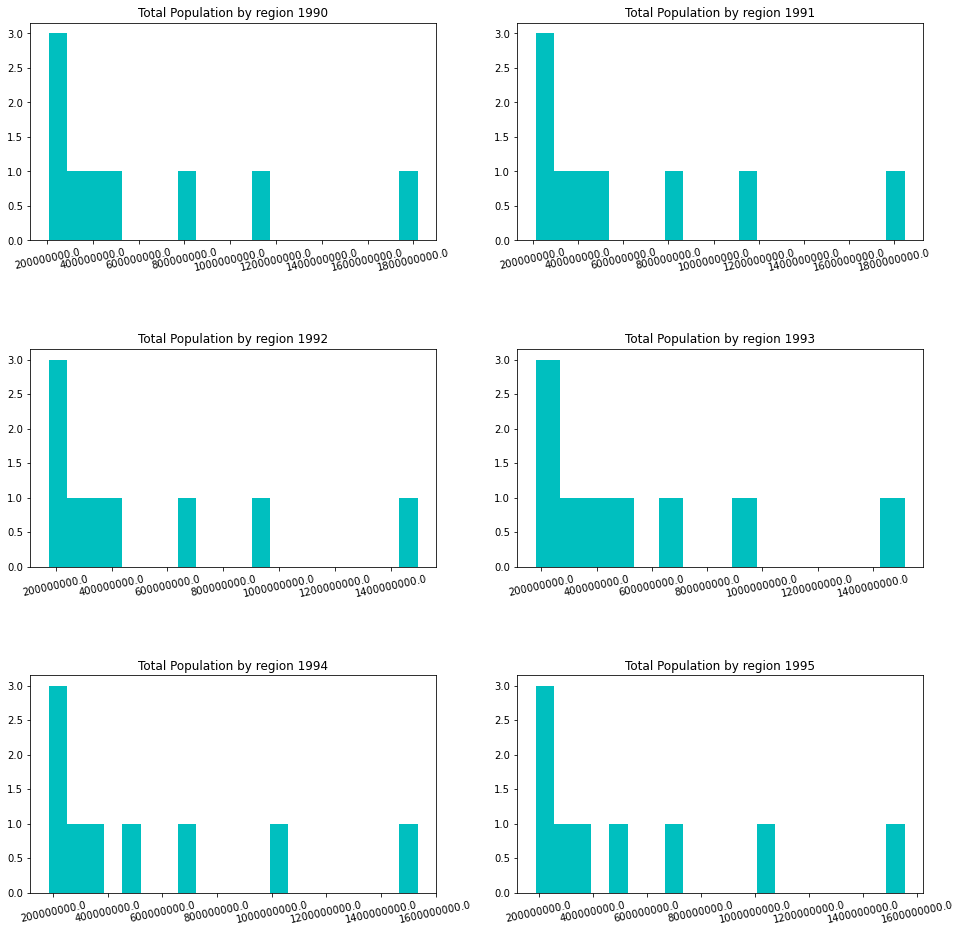

In [20]:
# Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

# First subplot 
ax[0,0].hist(df.population_1990, bins=20, color='c')
ax[0,0].set_title("Total Population by region 1990")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Second subplot 
ax[0,1].hist(df.population_1991, bins=20, color='c')
ax[0,1].set_title("Total Population by region 1991")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Third subplot
ax[1,0].hist(df.population_1992, bins=20, color='c')
ax[1,0].set_title("Total Population by region 1992")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# Fourth subplot
ax[1,1].hist(df.population_1993, bins=15, color='c')
ax[1,1].set_title("Total Population by region 1993")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 5
ax[2,0].hist(df.population_1994, bins=20, color='c')
ax[2,0].set_title("Total Population by region 1994")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[2,1].hist(df.population_1995, bins=20, color='c')
ax[2,1].set_title("Total Population by region 1995")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

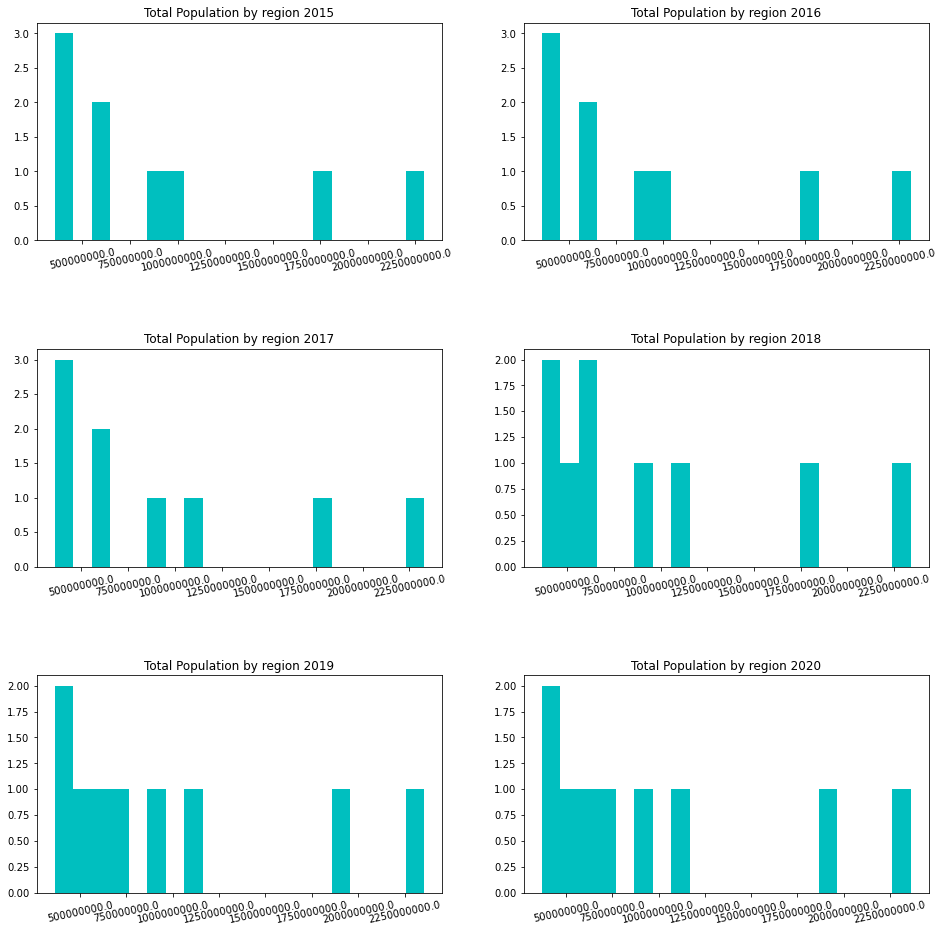

In [21]:
# # Create the plot object
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16) )

ax[0,0].hist(df.population_2015, bins=20, color='c')
ax[0,0].set_title("Total Population by region 2015")
ax[0,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[0,0].ticklabel_format(style='plain', axis='y')
ax[0,0].ticklabel_format(style='plain', axis='x')
ax[0,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

# 6 
ax[0,1].hist(df.population_2016, bins=20, color='c')
ax[0,1].set_title("Total Population by region 2016")
ax[0,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[0,1].ticklabel_format(style='plain', axis='y')
ax[0,1].ticklabel_format(style='plain', axis='x')
ax[0,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[1,0].hist(df.population_2017, bins=20, color='c')
ax[1,0].set_title("Total Population by region 2017")
ax[1,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[1,0].ticklabel_format(style='plain', axis='y')
ax[1,0].ticklabel_format(style='plain', axis='x')
ax[1,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[1,1].hist(df.population_2018, bins=20, color='c')
ax[1,1].set_title("Total Population by region 2018")
ax[1,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[1,1].ticklabel_format(style='plain', axis='y')
ax[1,1].ticklabel_format(style='plain', axis='x')
ax[1,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)

ax[2,0].hist(df.population_2019, bins=20, color='c')
ax[2,0].set_title("Total Population by region 2019")
ax[2,0].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))
ax[2,0].ticklabel_format(style='plain', axis='y')
ax[2,0].ticklabel_format(style='plain', axis='x')
ax[2,0].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


ax[2,1].hist(df.population_2020, bins=20, color='c')
ax[2,1].set_title("Total Population by region 2020")
ax[2,1].yaxis.set_major_formatter(ScalarFormatter(useMathText=False))   # Helps to remove the scientifc notation
ax[2,1].ticklabel_format(style='plain', axis='y')
ax[2,1].ticklabel_format(style='plain', axis='x')
ax[2,1].set_xticklabels(ax[0,0].get_xticks(), rotation=12)


# Adjust vertical space between subplots
fig.subplots_adjust(hspace=0.5)

# Show the graphs
plt.show()

### Boxplots

Text(0, 0.5, 'total')

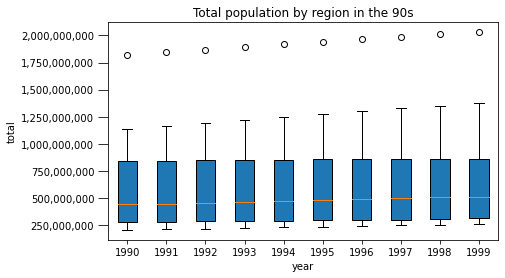

In [22]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_1990, df.population_1991, df.population_1992, df.population_1993,
                 df.population_1994, df.population_1995, df.population_1996, df.population_1997,
                  df.population_1998, df.population_1999], patch_artist=True,
                 labels=['1990','1991', '1992', '1993', '1994','1995','1996', '1997', '1998', '1999'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by region in the 90s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

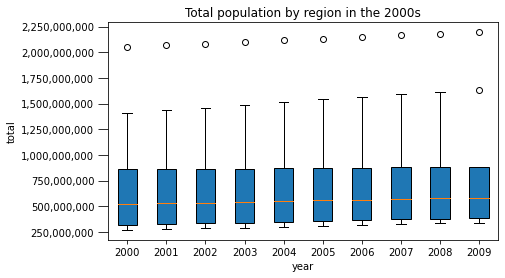

In [23]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_2000, df.population_2001, df.population_2002, df.population_2003,
                 df.population_2004, df.population_2005, df.population_2006, df.population_2007,
                  df.population_2008, df.population_2009], patch_artist=True,
                 labels=['2000','2001', '2002', '2003', '2004','2005','2006', '2007', '2008', '2009'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by region in the 2000s")
plt.xlabel("year")
plt.ylabel("total")

Text(0, 0.5, 'total')

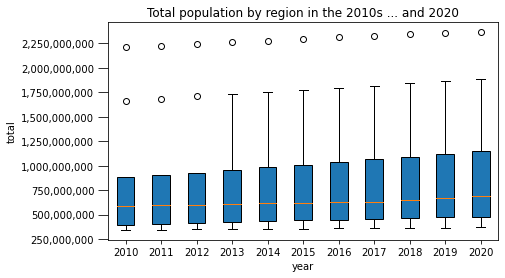

In [25]:
fig, ax = plt.subplots(figsize = (7,4))
bp1 = ax.boxplot([df.population_2010, df.population_2011, df.population_2012, df.population_2013,
                 df.population_2014, df.population_2015, df.population_2016, df.population_2017,
                  df.population_2018, df.population_2019,df.population_2020], patch_artist=True,
                 labels=['2010','2011', '2012', '2013', '2014','2015','2016', '2017', '2018', '2019', '2020'])

ax.yaxis.set_tick_params(tickdir='out', length=10)
ax.yaxis.set_ticklabels(['{:,.0f}'.format(y) for y in ax.get_yticks()])

plt.title("Total population by region in the 2010s ... and 2020")
plt.xlabel("year")
plt.ylabel("total")

## Regions with larger populations

In [26]:
filtered = df.sort_values(by=['population_1990'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_1990.tolist()

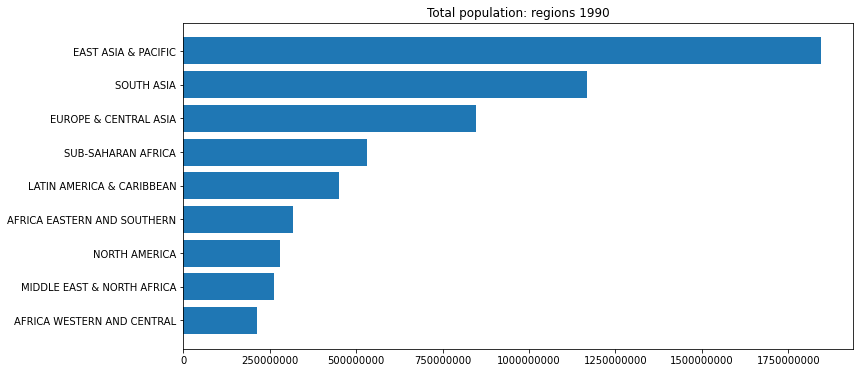

In [29]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 1990")
# plot
plt.show()

In [30]:
filtered = df.sort_values(by=['population_1991'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_1991.tolist()

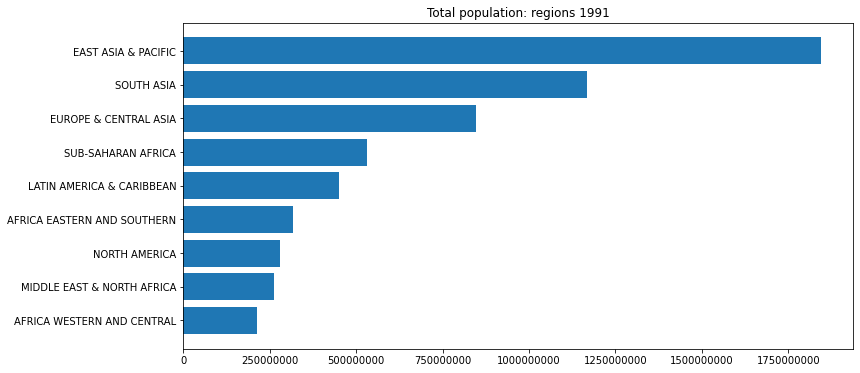

In [31]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 1991")
# plot
plt.show()

In [32]:
filtered = df.sort_values(by=['population_1992'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_1992.tolist()

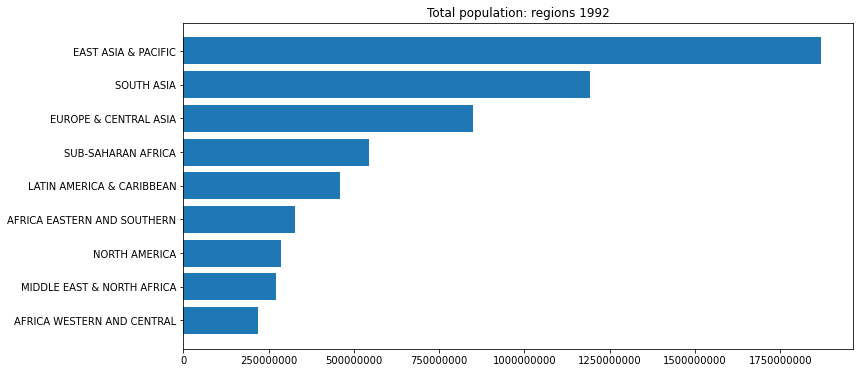

In [33]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 1992")
# plot
plt.show()

### Late 2010s and 2020

In [34]:
filtered = df.sort_values(by=['population_2018'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2018.tolist()

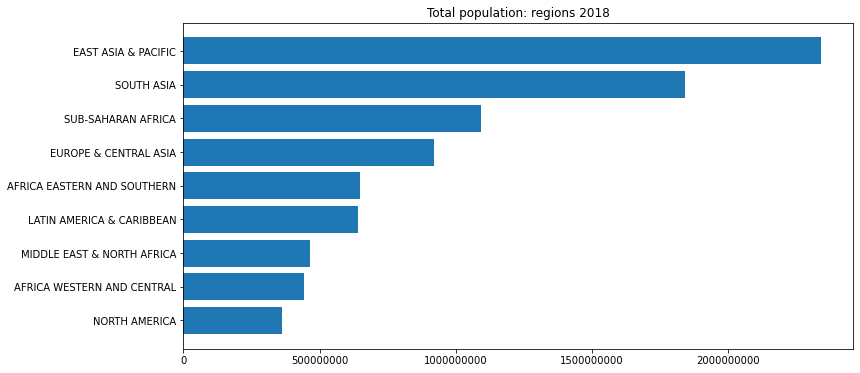

In [35]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 2018")
# plot
plt.show()

In [36]:
filtered = df.sort_values(by=['population_2019'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2019.tolist()

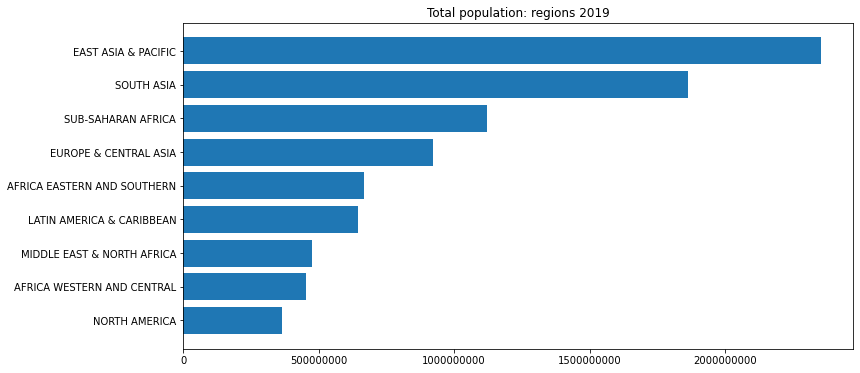

In [37]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()

# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')

# title
plt.title("Total population: regions 2019")
# plot
plt.show()

In [38]:
filtered = df.sort_values(by=['population_2020'], ascending = False).reset_index(drop=True).iloc[0:10]
countries = filtered.country_name.tolist()
values = filtered.population_2020.tolist()

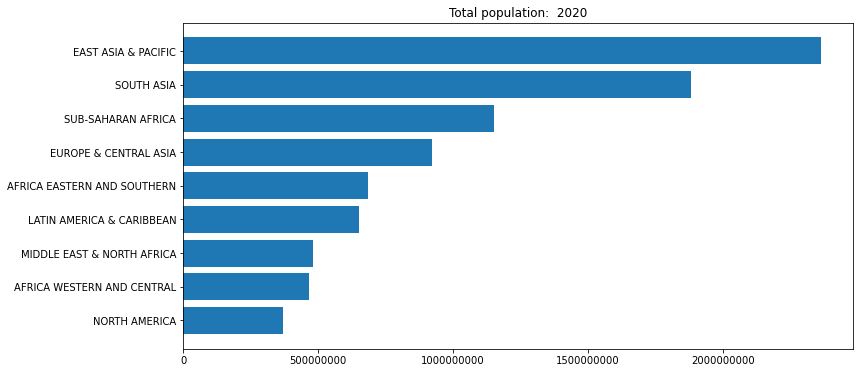

In [39]:
# Data
y_pos = [0, 1, 2, 3, 4,5,6,7,8]
performance = values

# Create the plot object
fig, ax = plt.subplots(figsize= (12,6))
ax.barh(y_pos, performance)

# Add labels
ax.set_yticks(y_pos)
ax.set_yticklabels(countries)

# Invert the y axis
ax.invert_yaxis()
# supress the scientific notation
ax.ticklabel_format(style='plain', axis='x')
# title
plt.title("Total population:  2020")

# plot
plt.show()